In [1]:
using CSV, DataFrames, Gadfly, Distributions, SparseArrays

include("GMRF.jl");
include("gridV1.jl");
include("gibbsV1.jl");

# Création de la grille à 9 cellules

Chaque cellule est représentée par un triplet $[\mu, \sigma, \xi]$ indiquant les vraie valeur des paramètres de la GEV à déterminer.

In [2]:
# Seed
Random.seed!(400)
# Dimensions de la grille
m₁ = 3;
m₂ = 3;
# Nb total de cellules
m = m₁ * m₂
# Insuffisance de rang de la matrice de structure
r = 1;
# Hyperparamètres
κᵤ = 100.0;
# Matrice de structure
W = buildStructureMatrix(m₁, m₂);
# Variances instrumentales de Metropolis pour μ et ϕ
σ² = 0.0015;

In [3]:
grid_target = generateTargetGridV1(m₁=m₁, m₂=m₂, κᵤ=κᵤ, W=W);

In [4]:
grid_target[:, :, 1]

3×3 Matrix{Float64}:
 0.0211641   0.0153844   -0.117718
 0.077531    0.00983722  -0.0508229
 0.0955774  -0.0244998   -0.0264531

# Génération de données

Le but est de générer des données sur chaque cellule à partir des paramètres de la GEV de la grille cible.

In [5]:
nobs = 100
data = generateData(grid_target, nobs);

# Modèle 

In [12]:
include("gibbsV1.jl");

niter = 100000
δ² = 0.003
κᵤ₀ = 10
μ₀ = zeros(m)
W = buildStructureMatrix(m₁, m₂);

κᵤ, μ = gibbs(niter, data, δ²=δ², κᵤ₀=κᵤ₀, μ₀=μ₀, W=W);


Taux d'acceptation μ1: 39.98 %
Taux d'acceptation μ2: 30.3 %
Taux d'acceptation μ3: 39.99 %
Taux d'acceptation μ4: 30.3 %
Taux d'acceptation μ5: 24.18 %
Taux d'acceptation μ6: 30.34 %
Taux d'acceptation μ7: 40.05 %
Taux d'acceptation μ8: 30.26 %
Taux d'acceptation μ9: 39.89 %


In [13]:
reshape(μ[:, end], 3, 3)

3×3 Matrix{Float64}:
 0.0133713  0.0149449  0.0155181
 0.0148757  0.0145961  0.0140755
 0.0153365  0.0149855  0.0145093

In [16]:
grid_target[:, :, 1]

3×3 Matrix{Float64}:
 0.0211641   0.0153844   -0.117718
 0.077531    0.00983722  -0.0508229
 0.0955774  -0.0244998   -0.0264531

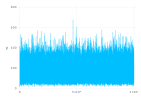

In [17]:
plot(y=κᵤ, Geom.line)

In [18]:
mean(κᵤ)

160.48939003847315

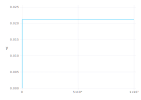

In [19]:
plot(y=μ[1, :], Geom.line)